# 질문 의도 파악 - 선형 모델

In [1]:
import numpy as np
import pandas as pd
import re
import time
from konlpy.tag import Mecab

### 1. 데이터 탐색

In [3]:
df = pd.read_csv('./questions/questions_corpus.csv', encoding='utf-8', index_col=0)
print(df.shape)
df.head(2)

(3010752, 2)


,question,intent
0,서비스가 후한 서양식 쩌는 데 궁금해서요,recommendation
1,간식타임 솔직반응 뭔데요,questionREV


In [4]:
df.intent.value_counts()

recommendation    1006992
questionREV       1001880
questionLOC       1001880
Name: intent, dtype: int64

In [5]:
df[100000:100010]

,question,intent
100000,영재식당 위치 뭐지,questionLOC
100001,반선 위치 어디에있어요,questionLOC
100002,쫄깃한 서양식 지리는 데 있나봐요,recommendation
100003,파크 평 여쭈어볼려고요,questionREV
100004,부자 솔직반응 어때?,questionREV
100005,풍광 멋있는 막창 괜찮은 데 뭘까요,recommendation
100006,생선초밥집 자세한 위치 궁금해요,questionLOC
100007,TEXAS 사람들 리뷰 알아보는데요,questionREV
100008,오이도생선구이 자세한 주소 물어볼려고요,questionLOC
100009,행복한한식뷔페 사람들 후기 어떤가요?,questionREV


### 2. 데이터 전처리


**Task 1 - 데이터를 train, test로 나눈다.**

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['question'].values, df['intent'].values
                                                   ,test_size=0.2) # 디폴트 값은 0.25

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2408601,), (2408601,), (602151,), (602151,))

이제 X_train, X_test의 SENTENCE 데이터를 한글과 공백만 남긴 후, 리스트에 저장한다.

In [8]:
KOREAN_RE = re.compile('[^ ㄱ-ㅣ가-힣a-zA-Z0-9]+')
STOPWORDS = set(['은','는','이','가','하','아','것','들','의','그','되','수','보','주','등','한'
                ,'나','같','우리','때','년','지','오','말','일','그렇','위하','때문','그것'
                ,'두','말하','알','그러나','받','일','또','그런','문제','그리고','크','중','나오','가지'
                ,'시키','지금','생각하','그러','속','하나','집','살','적','월','데','자신','안','어떤'
                ,'내','경우','명','생각','시간','그녀','다시','이런','앞','보이','번','나','다른','어떻','전','들'
                ,'사실','이렇','점','싶','말','정도','좀','원','통하','소리','놓'])

def text_prepare(text):
    
    # 한글과 스페이스바를 제외한 다른 문자들은 모두 지운다.
    text = KOREAN_RE.sub('', text) 
    
    # Mecab 토크나이저
    mecab = Mecab()
    
    # mecab으로 text를 형태소 단위로 나누어 morphs_tokens 리스트에 저장한다.
    # 불용어를 지운다.
    text = ' '.join(token for token in mecab.morphs(text) if token not in STOPWORDS)

    return text

In [ ]:
m = Mecab()
m.morphs('hi there')

In [ ]:
X_train = [text_prepare(x) for x in X_train]
X_test = [text_prepare(x) for x in X_test]

In [9]:
X_train[:3]

array(['중앙정육한우마을 자세한 위치 궁금하네요', '좋아서 공유하고 싶은 닭갈비 지리는 데 뭐뭐있어요',
       '대포식당 사람들 평가 아세요'], dtype=object)

In [29]:
y_train[:3]

array(['Q', 'Q', 'Q'], dtype=object)

In [30]:
X_test[:3]

array(['(주)서울감자탕 가 궁금해', '한성한우촌 문의', '크럽하우스식당 가 어떻게 되나요?'], dtype=object)

In [31]:
y_test[:3]

array(['Q', 'Q', 'Q'], dtype=object)

**Task 2 (WordsTagsCount).** 

In [32]:
# tag가 train 데이터에서 몇 번 나오는지 count해서 딕셔너리에 저장한다. 
tags_counts = {}
# 각 형태소가 train 데이터에서 몇 번 나오는지 count해서 딕셔너리에 저장한다.
words_counts = {}

for sentence in X_train:
    for word in sentence.split():
        if word in words_counts.keys():
            words_counts[word] += 1
        else:
            words_counts[word] = 1

for tag in y_train:
    if tag in tags_counts.keys():
        tags_counts[tag] += 1
    else:
        tags_counts[tag] = 1

In [33]:
len(tags_counts.keys()), len(words_counts.keys())

(2, 22954)

In [34]:
tags_counts

{'Q': 255198, 'R': 9552}

In [35]:
words_counts

{'막창구이구이': 13,
 '어떠니': 18288,
 '광어생각': 12,
 '가': 91188,
 '어떻게': 18164,
 '되나요?': 18164,
 '나영이네': 9,
 '궁금': 18237,
 '가채리식당': 11,
 '도': 18303,
 '가능한가요?': 18303,
 '배가네닭갈비': 9,
 '홀릭식당': 11,
 'S.W.A.T': 11,
 '어떤가요?': 18234,
 '옻벗은닭한마리': 11,
 '궁금해요': 18278,
 '닭요리하는남자': 12,
 '어때?': 18174,
 '청년다방의왕포일동점': 10,
 '핑크분식': 14,
 '문의할': 18181,
 '게': 18267,
 '있어요': 18181,
 '석원푸드': 9,
 '안동장터소고기국밥': 9,
 '월하주작': 12,
 '피플2': 13,
 '알고': 18239,
 '싶어요': 18239,
 '삼대부자': 12,
 '궁금해': 18270,
 '닭소리치킨': 13,
 '많아?': 18208,
 '한일분식': 13,
 '시골동태찌개': 14,
 '서광식당': 7,
 '질문': 18256,
 '강변횟집': 13,
 '어때요?': 18316,
 '사상꼬리집': 8,
 '함지': 12,
 '문의': 18138,
 '남한강': 11,
 '국제경양식': 9,
 '환이': 13,
 '혼자도돼지': 14,
 '일품(생고기)': 12,
 '북면막걸리': 10,
 '아르고스&coffee': 12,
 '사쿠라멘': 11,
 '부산아지매국밥&구포갈비': 8,
 '장교식당': 8,
 '거제회관': 14,
 '불리식당': 9,
 '청솔회타운': 13,
 '카페테리아': 12,
 '청춘봄봄': 11,
 '기와집보신탕': 12,
 '제일만나': 14,
 '화성옥': 11,
 '보쌈만족': 12,
 '마라도': 13,
 '거창골프장식당': 12,
 '구이와아구찜': 9,
 '명동본가': 12,
 'SPC라운지': 13,
 '한우사랑방': 12,
 '대원부페식당': 10,
 '연탄석쇠한판': 12,
 '소바'

In [36]:
len(X_train), len(y_train), len(X_test), len(y_test)

(264750, 264750, 66188, 66188)

*tags_counts*  : `{'어떤 단어': 빈도수}`
*words_counts* : `{'어떤 단어': 빈도수}`

역시ㅓ 빈도수 대로 sorting을 적용하면 다음과 같이 나타난다. `[('most_popular_word_or_tag', frequency), ('less_popular_word_or_tag', frequency), ...]`. 

    tag1,tag2,tag3
    word1,word2,word3

가장 많이 나온 3단어를 살펴보자.

In [37]:
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]

In [38]:
print('가장 많이 나온 tag:', most_common_tags)
print('가장 많이 나온 단어:', most_common_words)

가장 많이 나온 tag: [('Q', 255198), ('R', 9552)]
가장 많이 나온 단어: [('가', 91188), ('어때요?', 18316), ('도', 18303)]


### 텍스트 데이터를 벡터로 Transform하기

머신러닝 알고리즘을 돌리기 위해서 텍스트 데이터는 반드시 수치 데이터로 변환되어야 한다. 여러 방법이 있을 수 있지만 우리는 여기서 2가지 방법을 사용한다.

- Bag of words
- TfIdf

#### 1) Bag of words

1. train 데이터에서 가장 많이 나온 N개의 형태소를 찾아서, {형태소:벡터} 형태의 딕셔너리를 만든다.
2. 각각의 SENTENCE 마다 N 차원의 zero vector를 만든다.
3. 각 SENTENCE의 형태소를 iterate하면서 가장 많은 N 차원의 형태소에 해당하는 형태소를 발견하면 해당 벡터에 1을 추가한다.

ex. *N* = 4이고 가장 많이 나온 N개의 형태소가 아래와 같은 예제를 생각해보자.

    ['hi', 'you', 'me', 'are']

위 4개의 단어를 수치화 하여 아래와 같이 나타낸다.

    {'hi': 0, 'you': 1, 'me': 2, 'are': 3}

위 딕셔너리를 이용하여 아래 문장을 벡터화 해보자.

    'hi how are you'

먼저 아래와 같은 4차원의 zero 벡터를 만들어야 한다.

    [0, 0, 0, 0]
    
벡터화 시킬 문장의 모든 형태소를 iterate 하면서, 각 단어가 나올 때마다 해당 벡터에 1을 추가한다.

    'hi':  [1, 0, 0, 0]
    'how': [1, 0, 0, 0] # 'how'는 딕셔너리에 있는 단어가 아니기 때문에 아무 것도 더하지 않는다.
    'are': [1, 0, 0, 1]
    'you': [1, 1, 0, 1]

이에 따라 나온 'hi how are you'의 벡터화 버전:

    [1, 1, 0, 1]
   
이제 5000의 딕셔너리 사이즈를 갖는 *my_bag_of_words* 를 정의하여 train 데이터에서 가장 많이 나온 5000개의 단어를 찾는 함수를 정의한다.

In [39]:
DICT_SIZE = 3000
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:DICT_SIZE]
most_common_words = list(zip(*most_common_words))[0]
WORDS_TO_INDEX = {x : i for i, x in enumerate(most_common_words)}
INDEX_TO_WORDS = dict(enumerate(most_common_words))
ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: str 타입의 문장
        dict_size: dict_size만큼 가장 많이 나온 단어를 저장한다. dict_size=3000이라면, train 데이터에서 가장 많이 나온 3000단어를 찾는다.
        return 'text' 데이터를 bag-of-words 기법으로 벡터화하여 ndarray 형태로 반환
    """
    
    result_vector = np.zeros(dict_size)
    mecab = Mecab()
    for word in mecab.morphs(text):
        if word in words_to_index.keys():
            if words_to_index[word] < dict_size:
                result_vector[words_to_index[word]] = 1

    return result_vector

위 함수를 train, test 데이터의 모든 문장에 적용하여, 텍스트 데이터를 벡터화시킨 후, 그것을 희소행렬로 나타낸다.

In [40]:
from scipy import sparse as sp_sparse

In [41]:
%%time 

X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) \
                                  for text in X_train])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) \
                                 for text in X_test])

print('X_train shape ', X_train_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (264750, 3000)
X_test shape  (66188, 3000)
CPU times: user 4min 20s, sys: 2min 49s, total: 7min 10s
Wall time: 7min 13s


여기서 우리는 텍스트 데이터를 수치화 하여 벡터로 만든 후 그것을 다시 희소 행렬로 나타냈다.
희소 행렬에는 다양한 타입이 있다: [type](https://docs.scipy.org/doc/scipy/reference/sparse.html)  <br>
하지만 sklearn 알고리즘은 [csr] 형태만 다룰 수 있기 때문에 여기서는 csr_matrix를 사용한다.(https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix)

**Task 3 (BagOfWords).** *X_train_mybag* 의 처음 11개 행에서 non-zero인 원소는 얼마나 있었는지 살펴본다.

In [43]:
X_train_mybag[10].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [44]:
X_train_mybag[10].toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
for i in range(0,11):
    row = X_train_mybag[i].toarray()[0]
    non_zero_elements_count = row.sum()
    print('index',i,'\trow의 non-zero 원소의 수:', int(non_zero_elements_count))

index 0 	row의 non-zero 원소의 수: 0
index 1 	row의 non-zero 원소의 수: 2
index 2 	row의 non-zero 원소의 수: 2
index 3 	row의 non-zero 원소의 수: 1
index 4 	row의 non-zero 원소의 수: 3
index 5 	row의 non-zero 원소의 수: 0
index 6 	row의 non-zero 원소의 수: 0
index 7 	row의 non-zero 원소의 수: 4
index 8 	row의 non-zero 원소의 수: 1
index 9 	row의 non-zero 원소의 수: 0
index 10 	row의 non-zero 원소의 수: 5


index 3의 데이터를 살펴보자.

In [46]:
# 텍스트 데이터
X_train[3]

'가채리식당 도 가능한가요?'

In [47]:
# 벡터화된 데이터
X_train_mybag[3].toarray()

array([[0., 0., 1., ..., 0., 0., 0.]])

#### TF-IDF

TF-IDF 방법은 bag-of-words 기법에서 추가적으로, 형태소 단어의 전체 빈도수를 고려해 해당 형태소 단어가 얼마나 의미 있는 특성인지를 계산해서 스케일을 조정한다.

*tfidf_features* 함수는 *scikit-learn*의 [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) 을 이용하여 데이터를 벡터화시킨다. 

*train* 데이터를 이용해 vectorizer를 학습시킨다. 이 때 너무 적게 나온 단어를 제거 하려면 min_df 파라미터를 사용한다. <br>
min_df = 5이면, 총 train 데이터에서 5번보다 적게 나온 형태소 단어들은 제거한다. <br>
너무 자주 나온 단어를 제거하려면 max_df 파라미터를 사용한다. <br>
max_df = 0.9이면, train 데이터의 각 SENTENCE에서 90% 이상 나온 단어를 제거한다는 뜻이다. <br>
또한 ngram_range를 이용하여 유니그램까지 고려할 수 있다. <br>

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
def tfidf_features(X_train, X_test):
    """
        X_train, X_test — 텍스트 데이터
        return TF-IDF 기법으로 벡터화된 데이터
    """
    
    # TF-IDF vectorizer를 생성한다.
    tfidf_vectorizer = TfidfVectorizer(min_df=5
                                      ,max_df=0.9
                                      ,ngram_range=(1,2)
                                      ,token_pattern='(\S+)') #공백을 제거한 모든 문자/숫자/특수문자
    # vectorizer를 train 데이터로 훈련시킨다.
    tfidf_vectorizer.fit(X_train)
    
    # train, test 데이터를 벡터화 하고 (transform) 그 결과를 return 한다.
    X_train = tfidf_vectorizer.transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)
    
    return X_train, X_test, tfidf_vectorizer.vocabulary_

In [50]:
# 함수의 적용
X_train_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_test)

In [51]:
# tfidf_vocab에는 각 형태소 단어와 각각의 벡터 표현이 딕셔너리 형태로 들어 있다. (형태소단어 : 벡터화)
tfidf_vocab

{'막창구이구이': 8784,
 '어떠니': 19636,
 '광어생각': 2272,
 '가': 370,
 '어떻게': 19638,
 '되나요?': 7241,
 '광어생각 가': 2273,
 '가 어떻게': 375,
 '어떻게 되나요?': 19639,
 '나영이네': 3950,
 '궁금': 2696,
 '가 궁금': 371,
 '가채리식당': 639,
 '도': 6560,
 '가능한가요?': 401,
 '도 가능한가요?': 6561,
 '배가네닭갈비': 11962,
 '홀릭식당': 30607,
 's.w.a.t': 348,
 '어떤가요?': 19637,
 '옻벗은닭한마리': 21581,
 '궁금해요': 2698,
 '옻벗은닭한마리 가': 21582,
 '가 궁금해요': 373,
 '닭요리하는남자': 5477,
 '어때?': 19632,
 '청년다방의왕포일동점': 25618,
 '핑크분식': 28589,
 '문의할': 10671,
 '게': 1175,
 '있어요': 23376,
 '문의할 게': 10672,
 '게 있어요': 1179,
 '석원푸드': 15368,
 '안동장터소고기국밥': 19027,
 '월하주작': 22198,
 '피플2': 28565,
 '알고': 19152,
 '싶어요': 18359,
 '피플2 가': 28566,
 '가 알고': 374,
 '알고 싶어요': 19153,
 '삼대부자': 14562,
 '궁금해': 2697,
 '삼대부자 가': 14563,
 '가 궁금해': 372,
 '닭소리치킨': 5475,
 '많아?': 8987,
 '한일분식': 29312,
 '시골동태찌개': 17706,
 '서광식당': 14993,
 '질문': 25254,
 '강변횟집': 1034,
 '어때요?': 19635,
 '사상꼬리집': 14142,
 '함지': 29509,
 '문의': 10670,
 '남한강': 4298,
 '국제경양식': 2571,
 '환이': 30942,
 '혼자도돼지': 30598,
 '혼자도돼지 가': 30599,
 '일품(생고기)': 

In [52]:
# tfidf_vocab 딕셔너리의 key,value를 서로 바꿔준다. -> (벡터화 : 형태소단어)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [53]:
tfidf_reversed_vocab

{8784: '막창구이구이',
 19636: '어떠니',
 2272: '광어생각',
 370: '가',
 19638: '어떻게',
 7241: '되나요?',
 2273: '광어생각 가',
 375: '가 어떻게',
 19639: '어떻게 되나요?',
 3950: '나영이네',
 2696: '궁금',
 371: '가 궁금',
 639: '가채리식당',
 6560: '도',
 401: '가능한가요?',
 6561: '도 가능한가요?',
 11962: '배가네닭갈비',
 30607: '홀릭식당',
 348: 's.w.a.t',
 19637: '어떤가요?',
 21581: '옻벗은닭한마리',
 2698: '궁금해요',
 21582: '옻벗은닭한마리 가',
 373: '가 궁금해요',
 5477: '닭요리하는남자',
 19632: '어때?',
 25618: '청년다방의왕포일동점',
 28589: '핑크분식',
 10671: '문의할',
 1175: '게',
 23376: '있어요',
 10672: '문의할 게',
 1179: '게 있어요',
 15368: '석원푸드',
 19027: '안동장터소고기국밥',
 22198: '월하주작',
 28565: '피플2',
 19152: '알고',
 18359: '싶어요',
 28566: '피플2 가',
 374: '가 알고',
 19153: '알고 싶어요',
 14562: '삼대부자',
 2697: '궁금해',
 14563: '삼대부자 가',
 372: '가 궁금해',
 5475: '닭소리치킨',
 8987: '많아?',
 29312: '한일분식',
 17706: '시골동태찌개',
 14993: '서광식당',
 25254: '질문',
 1034: '강변횟집',
 19635: '어때요?',
 14142: '사상꼬리집',
 29509: '함지',
 10670: '문의',
 4298: '남한강',
 2571: '국제경양식',
 30942: '환이',
 30598: '혼자도돼지',
 30599: '혼자도돼지 가',
 23243: '일품(

In [54]:
# shape을 보면 열이 30,970개 있으므로 tfidf를 통해 나온 형태소 벡터가 총 30,970개임을 알 수 있다.
X_train_tfidf.shape, X_test_tfidf.shape

((264750, 30970), (66188, 30970))

### MultiLabel classifier

train/test 데이터에는 태그가 2개 있다. '문의'와 '추천'이다. test 데이터를 보고 태그를 예측하기 위해서는 각 tag 역시 binary 수치형으로 변환시켜야 한다. <br>
이러한 변환을 위해 여기서는 *sklearn*의 MultiLabel Binarizer를 사용한다. [MultiLabelBinarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html)

In [55]:
from sklearn.preprocessing import MultiLabelBinarizer

In [56]:
tags_counts

{'Q': 255198, 'R': 9552}

In [57]:
# MultiLabelBinarizer 생성, tag_counts의 key인 '문의','추천'을 count 순으로 sort하여 만든다.
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys())) 

In [58]:
mlb

MultiLabelBinarizer(classes=['Q', 'R'], sparse_output=False)

In [59]:
# y_train으로 훈련(fit)시킨 후 벡터화(transform)시키는 함수 fit_transform를 사용한다.
y_train = mlb.fit_transform(y_train)

In [60]:
y_test = mlb.transform(y_test)

Classifier를 훈련시키는 함수 *train_classifier* 를 정의한다. 여기서는 *sklearn*의 One-vs-Rest approach 기법을 사용한다.<br>
[OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) 

이 방법으로 *k* (= number of tags) 개의 classifier를 훈련시킬 수 있다. 기본적인 분류 방법으로는 [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 을 사용한다. 

가장 간단한 방법이지만, 텍스트 분류 작업에서 좋은 성능을 낸다. 분류할 tag가 많을 수록 시간이 많이 걸린다.

In [61]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [62]:
def train_classifier(X_train, y_train):
    """
      X_train, y_train — train 데이터
      return: 훈련된 classifier
    """

    return OneVsRestClassifier(LogisticRegression(penalty= 'l2' #L2 규제 사용
                                                , C = 10
                                                , max_iter = 1000)).fit(X_train, y_train)

우리는 이전에 다음 2가지 벡터화 기법을 사용했다: *bag-of-words*, *tf-idf* <br>
이 2가지 데이터를 이용해 각각의 classifier를 훈련시킨다.

In [63]:
X_train[:10]

array(['막창구이구이 어떠니', '광어생각 가 어떻게 되나요?', '나영이네 가 궁금', '가채리식당 도 가능한가요?',
       '배가네닭갈비 도 가능한가요?', '홀릭식당 어떠니', 'S.W.A.T 어떤가요?', '옻벗은닭한마리 가 궁금해요',
       '닭요리하는남자 어때?', '청년다방의왕포일동점 어떤가요?'], dtype=object)

In [64]:
classifier_mybag = train_classifier(X_train_mybag, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

/anaconda3/envs/text_anal/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/text_anal/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
classifier_mybag

OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

이제 test 데이터의 태그를 예측할 수 있다: labels, scores

In [66]:
y_test_predicted_labels_mybag = classifier_mybag.predict(X_test_mybag)
y_test_predicted_scores_mybag = classifier_mybag.decision_function(X_test_mybag)

y_test_predicted_labels_tfidf = classifier_tfidf.predict(X_test_tfidf)
y_test_predicted_scores_tfidf = classifier_tfidf.decision_function(X_test_tfidf)

In [67]:
# bag-of-words로 예측한 tag의 벡터화표현 ('Q' : [1,0], 'R' : [0,1])
y_test_predicted_labels_mybag

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]])

In [68]:
# tf-idf로 예측한 tag의 벡터화표현 ('Q' : [1,0], 'R' : [0,1])
y_test_predicted_labels_tfidf

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]])

이제 몇 개의 데이터에서 TF-IDF를 사용한 분류기가 어떻게 작동하는지 보자:

In [69]:
# 벡터화된 태그를 다시 텍스트 데이터로 변환시킨다.
y_test_pred_inversed = mlb.inverse_transform(y_test_predicted_labels_tfidf)
y_test_pred_inversed

[('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('R',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('R',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('R',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('R',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('R',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 

In [70]:
y_test_inversed = mlb.inverse_transform(y_test)
y_test_inversed

[('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('R',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('R',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('R',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('R',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('R',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 ('Q',),
 

In [71]:
for i in range(4):
    print('Title:\t{}\n정답:\t{}\n예측:\t{}\n\n'.format(
        X_test[i],
        ','.join(y_test_inversed[i]),
        ','.join(y_test_pred_inversed[i])
    ))

Title:	(주)서울감자탕 가 궁금해
정답:	Q
예측:	Q


Title:	한성한우촌 문의
정답:	Q
예측:	Q


Title:	크럽하우스식당 가 어떻게 되나요?
정답:	Q
예측:	Q


Title:	아름다운밥상 어떠니
정답:	Q
예측:	Q




위 4개의 데이터는 잘 예측이 된 것 같다. 이제 전체 데이터가 얼만큼 예측이 잘 되었는지 살펴보자. 

### Evaluation

모델 평가를 위해 사용할 classification metrics:
 - [Accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
 - [F1-score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
 - [Area under ROC-curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
 - [Area under precision-recall curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score) 
 
위 문서에서 micro/macro/weighted averaging 이 무엇인지 잘 살펴보자.

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

*print_evaluation_scores* 를 정의하여 정확도를 평가해본다.
 - *accuracy*
 - *F1-score macro/micro/weighted*
 - *Precision macro/micro/weighted*

In [73]:
def print_evaluation_scores(y_test, predicted):
    print('accuracy_score :', accuracy_score(y_test, predicted))

    f1_macro = f1_score(y_test, predicted, average='macro')
    f1_micro = f1_score(y_test, predicted, average='micro')
    f1_weighted = f1_score(y_test, predicted, average='weighted')

    print('F1-score macro :', f1_macro)
    print('F1-score micro :', f1_micro)
    print('F1-score weighted :', f1_weighted)

    print('Precision macro :', average_precision_score(y_test, predicted, average='macro'))
    print('Precision micro :', average_precision_score(y_test, predicted, average='micro'))
    print('Precision weighted :', average_precision_score(y_test, predicted, average='weighted'))

In [74]:
y_test.shape, y_test_predicted_labels_mybag.shape

((66188, 2), (66188, 2))

In [75]:
print('Bag-of-words')
print_evaluation_scores(y_test, y_test_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_test, y_test_predicted_labels_tfidf)

Bag-of-words
accuracy_score : 0.9982927418867469
F1-score macro : 0.9877985245668954
F1-score micro : 0.9982927418867469
F1-score weighted : 0.9982806035189626
Precision macro : 0.9768318712874456
Precision micro : 0.9974420275603856
Precision weighted : 0.9969470928293362
Tfidf
accuracy_score : 0.9996827219435547
F1-score macro : 0.9977549417740537
F1-score micro : 0.9996827219435547
F1-score weighted : 0.9996820618848006
Precision macro : 0.9956871785243373
Precision micro : 0.9995241835806972
Precision weighted : 0.999377235137346


정확도가 96%이다.

You might also want to plot some generalization of the [ROC curve](http://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc) for the case of multi-label classification. Provided function *roc_auc* can make it for you. The input parameters of this function are:
 - true labels
 - decision functions scores
 - number of classes

In [92]:
# 이건 지금 오류가 나서 나중에
from metrics import roc_auc
%matplotlib inline

ImportError: cannot import name 'roc_auc'

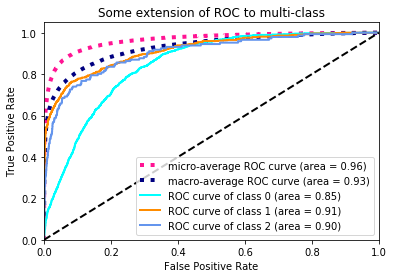

In [55]:
n_classes = len(tags_counts)
roc_auc(y_test, y_test_predicted_scores_mybag, n_classes)

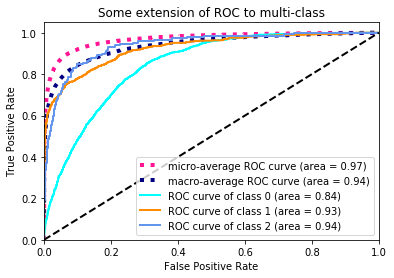

In [56]:
n_classes = len(tags_counts)
roc_auc(y_test, y_test_predicted_scores_tfidf, n_classes)

**Task 4 (MultilabelClassification).** 

- bag-of-words, TF-IDF의 성능을 비교해본다.
- *L1*, *L2* 규제를 각각 사용해본다.
- C (coefficients) 값을 달리 해본다. (0.1, 1, 10, 100) -> 가장 예측도가 높은 C 값을 찾는다.

In [94]:
from sklearn.svm import LinearSVC
classifier_mybag = OneVsRestClassifier(LinearSVC(C = 1)).fit(X_train_mybag, y_train) # C값 변화시켜본다.
classifier_tfidf = OneVsRestClassifier(LinearSVC(C = 1)).fit(X_train_tfidf, y_train) # C값 변화시켜본다.

y_test_predicted_labels_mybag = classifier_mybag.predict(X_test_mybag)
y_test_predicted_scores_mybag = classifier_mybag.decision_function(X_test_mybag)

y_test_predicted_labels_tfidf = classifier_tfidf.predict(X_test_tfidf)
y_test_predicted_scores_tfidf = classifier_tfidf.decision_function(X_test_tfidf)
y_test_pred_inversed = mlb.inverse_transform(y_test_predicted_labels_tfidf)
y_test_inversed = mlb.inverse_transform(y_test)
for i in range(3):
    print('Title:\t{}\n답:\t{}\n예측:\t{}\n\n'.format(
        X_test[i],
        ','.join(y_test_inversed[i]),
        ','.join(y_test_pred_inversed[i])
    ))
    
print('F1 Score weighted\nTFIDF:\t{}\tBOW:\t{}\n'
          .format(f1_score(y_test, y_test_predicted_labels_tfidf, average='weighted'), 
                  f1_score(y_test, y_test_predicted_labels_mybag, average='weighted')))

Title:	사과 얼마 예요
답:	Q
예측:	Q


Title:	저기요 여기 후추 에 요 개
답:	Q
예측:	Q


Title:	프라다 스타일 가방 도 나요
답:	Q
예측:	Q


F1 Score weighted
TFIDF:	0.9671916651339877	BOW:	0.9610493975692884



원하는 질문을 직접 만들어서 우리 모델이 잘 예측하는지 알아본다.

In [109]:
len(y_chatbot)

6

In [85]:
X_chatbot = [
    '맛있는 파스타집 추천해주세요'
    , '종로에 분위기 좋은 순대국밥집 있나요?'
    , '서울에 데이트하기 좋은 파스타집 추천해주세요.'
    , '그 순대국밥 집 주소가 어떻게 되나요?'
    , '그 파스타집 전화번호좀 알려주세요.'
    , '그 순대국밥 집 어때요?'
    , '어떤 순대국밥집이 괜찮은 곳 있어요?'
]
y_chatbot = [
    'R','R','R','Q','Q','Q','R'
]

# SENTENCE 데이터 전처리
X_chatbot = [text_prepare(x) for x in X_chatbot]

# bag-of-words
X_chatbot_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) \
                                  for text in X_chatbot])

# tf-idf
_, X_chatbot_tfidf, _ = tfidf_features(X_train, X_chatbot)

# tag 데이터 전처리
y_chatbot = mlb.transform(y_chatbot)

# tag 예측
y_chatbot_predicted_labels_mybag = classifier_mybag.predict(X_chatbot_mybag)
y_chatbot_predicted_scores_mybag = classifier_mybag.decision_function(X_chatbot_mybag)

y_chatbot_predicted_labels_tfidf = classifier_tfidf.predict(X_chatbot_tfidf)
y_chatbot_predicted_scores_tfidf = classifier_tfidf.decision_function(X_chatbot_tfidf)

# 예측된 tag를 텍스트로 변환
y_chatbot_pred_inversed = mlb.inverse_transform(y_chatbot_predicted_labels_tfidf)
y_chatbot_inversed = mlb.inverse_transform(y_chatbot)

for i in range(0,len(y_test)):
    print('SENTENCE:\t{}\n정답:\t{}\t예측:\t{}\n'.format(
        X_chatbot[i],
        ','.join(y_chatbot_inversed[i]),
        ','.join(y_chatbot_pred_inversed[i])
    ))

SENTENCE:	맛있 파스타 추천 해 세요
정답:	R	예측:	R

SENTENCE:	종로 에 분위기 좋 순대 국밥 있 나요
정답:	R	예측:	Q

SENTENCE:	서울 에 데이트 기 좋 파스타 추천 해 세요
정답:	R	예측:	R

SENTENCE:	순대 국밥 주소 어떻게 나요
정답:	Q	예측:	Q

SENTENCE:	파스타 전화 번호 알려 세요
정답:	Q	예측:	Q

SENTENCE:	순대 국밥 어때요
정답:	Q	예측:	Q

SENTENCE:	순대 국밥 괜찮 곳 있 어요
정답:	R	예측:	R



IndexError: list index out of range